In [1]:
using Random
include("src/plotting_utils.jl")
include("src/guillotine_utils.jl")

coarseness_g (generic function with 1 method)

In [40]:
# Un ejemplo que toma K=7 en la version inicial del algoritmo DP
#                     K=4 en la version que omite secciones vacias coarseness_g(S,w)

n = 15
S = [
    0.7557374686676213  0.06419492229827028
    0.8184525221911587  0.5211640578368422
    0.5469180755043479  0.9571141421428488
    0.4351982955216729  0.34233991655949003
    0.5473231274475154  0.4399280293513139
    0.5837482725271874  0.5085426217218953
    0.38485213519511574 0.7381652031724553
    0.3941770305843393  0.03540479609509273
    0.8429600343652437  0.8372836029407078
    0.7568101146333601  0.14823287100088112
    0.5104238027781562  0.5728775814190357
    0.8093078142897505  0.7490086251499939
    0.9172768358572758  0.9258864485501244
    0.525837899873983   0.13038851026664688
    0.21643189932478601 0.004892368089211452
]

w = [-1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1];

In [16]:
C, P, D, midpoints_x, midpoints_y, argcuts, idxcuts = coarseness_g(S,w);

C[1,1,n,n]=2


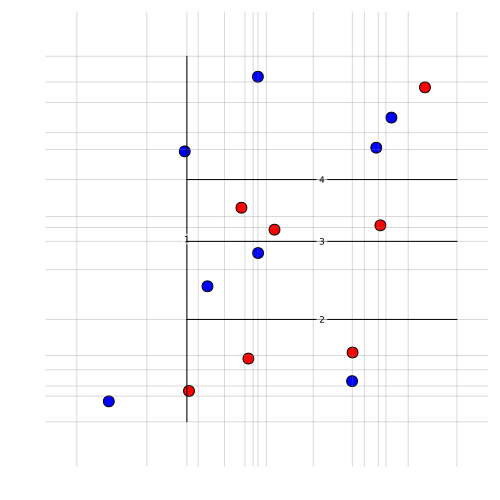

In [17]:
println("C[1,1,n,n]=$(C[1,1,n,n])")
fig = plot_rb_points(S, w)
plot_add_lines!(fig, S)
plot_guillotine_line!(fig,1,1,n,n)
fig

In [55]:
# BnB test

# Data generation ########################################################################
# n = 15
# S = rand(n,2)
# half = n ÷ 2
# w = shuffle([ones(Int,half)...,-ones(Int,n-half)...]) # w = rand([-1,1], n)

# Utils ##################################################################################
sortperm_x = sortperm(S[:, 1])
sorted_x = S[sortperm_x, 1]
midpoints_x = sorted2midpoints(sorted_x)

sortperm_y = sortperm(S[:, 2])
sorted_y = S[sortperm_y, 2]
midpoints_y = sorted2midpoints(sorted_y)

# Esto HAY que cambiarlo por un "orthogonal range count"
Disc_pqij(p,q,i,j) = abs(sum(w[intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1])]))
Count_pqij(p,q,i,j) = length(intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1]))

# Initialization #########################################################################

C = Inf*ones(Int,n,n,n,n)
P = zeros(Int,n,n,n,n)
D = zeros(Int,n,n,n,n)


for p = 1:n
    for q = 1:n
        for i = 1:n-p+1
            for j = 1:n-q+1
                P[p,q,i,j] = Count_pqij(p,q,i,j)
                D[p,q,i,j] = Disc_pqij(p,q,i,j)
            end
            if P[p,q,1,1] != 0
                C[p,q,1,1] = D[p,q,1,1]
            end
        end
    end
end

In [49]:
D[3,2,13,4]

2

In [53]:
function foo(p,q,i,j,c)
    println("$p $q $i $j $c")
    if C[p,q,i,j] != Inf
        return C[p,q,i,j]
    end
    
    d = D[p,q,i,j]
    if d < c # if d>=c no dision needed??
        for s = 1:i-1
            c1 = foo(p,q,s,j,c)
            c2 = foo(p+s,q,i-s,j,c1)
            cc = min(c1,c2)
            if cc > c
                c = cc
            end
        end
        
        for t = 1:j-1
            c1 = foo(p,q,i,t,c)
            c2 = foo(p,q+t,i,j-t,c1)
            cc = min(c1,c2)
            if cc > c
                c = cc
            end
        end    
    end
    C[p,q,i,j] = c
    return c
end


foo (generic function with 1 method)

In [56]:
foo(1,1,n,n,Inf)

1 1 15 15 Inf
1 1 1 15 Inf
1 1 1 1 Inf
1 2 1 14 1.0
1 2 1 1 1.0
1 3 1 13 1.0
1 3 1 1 1.0
1 4 1 12 1.0
1 4 1 1 1.0
1 5 1 11 1.0
1 5 1 1 1.0
1 6 1 10 1.0
1 6 1 1 1.0
1 7 1 9 1.0
1 7 1 1 1.0
1 8 1 8 1.0
1 8 1 1 1.0
1 9 1 7 1.0
1 9 1 1 1.0
1 10 1 6 1.0
1 10 1 1 1.0
1 11 1 5 1.0
1 11 1 1 1.0
1 12 1 4 1.0
1 12 1 1 1.0
1 13 1 3 1.0
1 13 1 1 1.0
1 14 1 2 1.0
1 14 1 1 1.0
1 15 1 1 1.0
1 13 1 2 1.0
1 13 1 1 1.0
1 14 1 1 1.0
1 15 1 1 1.0
1 12 1 2 1.0
1 12 1 1 1.0
1 13 1 1 1.0
1 14 1 2 1.0
1 12 1 3 1.0
1 12 1 1 1.0
1 13 1 2 1.0
1 12 1 2 1.0
1 14 1 1 1.0
1 15 1 1 1.0
1 11 1 2 1.0
1 11 1 1 1.0
1 12 1 1 1.0
1 13 1 3 1.0
1 11 1 3 1.0
1 11 1 1 1.0
1 12 1 2 1.0
1 11 1 2 1.0
1 13 1 1 1.0
1 14 1 2 1.0
1 11 1 4 1.0
1 11 1 1 1.0
1 12 1 3 1.0
1 11 1 2 1.0
1 13 1 2 1.0
1 11 1 3 1.0
1 14 1 1 1.0
1 15 1 1 1.0
1 10 1 2 1.0
1 10 1 1 1.0
1 11 1 1 1.0
1 12 1 4 1.0
1 10 1 3 1.0
1 10 1 1 1.0
1 11 1 2 1.0
1 10 1 2 1.0
1 12 1 1 1.0
1 13 1 3 1.0
1 10 1 4 1.0
1 10 1 1 1.0
1 11 1 3 1.0
1 10 1 2 1.0
1 12 1 2 1.0
1 10 1 3 1

Excessive output truncated after 524300 bytes.

2 12 1 1 Inf
2 7 1 3 Inf
2 7 1 1 Inf
2 8 1 2 Inf
2 8 1 1 Inf
2 9 1 1 Inf
2 7 1 2 Inf
2 7 1 1 Inf
2 8 1 1 Inf
2 9 1 1 Inf
2 10 1 3 Inf
2 10 1 1 Inf
2 11 1 2 Inf
2 11 1 1 Inf
2 12 1 1 1.0
2 10 1 2 Inf
2 10 1 1 Inf
2 11 1 1 Inf
2 12 1 1 Inf
2 7 1 4 Inf
2 7 1 1 Inf
2 8 1 3 Inf
2 8 1 1 Inf
2 9 1 2 Inf
2 9 1 1 Inf
2 10 1 1 Inf
2 8 1 2 Inf
2 8 1 1 Inf
2 9 1 1 Inf
2 10 1 1 Inf
2 7 1 2 Inf
2 7 1 1 Inf
2 8 1 1 Inf
2 9 1 2 Inf
2 9 1 1 Inf
2 10 1 1 Inf
2 7 1 3 Inf
2 7 1 1 Inf
2 8 1 2 Inf
2 8 1 1 Inf
2 9 1 1 Inf
2 7 1 2 Inf
2 7 1 1 Inf
2 8 1 1 Inf
2 9 1 1 Inf
2 10 1 1 Inf
2 11 1 2 Inf
2 11 1 1 Inf
2 12 1 1 1.0
2 7 1 5 Inf
2 7 1 1 Inf
2 8 1 4 Inf
2 8 1 1 Inf
2 9 1 3 Inf
2 9 1 1 Inf
2 10 1 2 Inf
2 10 1 1 Inf
2 11 1 1 Inf
2 9 1 2 Inf
2 9 1 1 Inf
2 10 1 1 Inf
2 11 1 1 Inf
2 8 1 2 Inf
2 8 1 1 Inf
2 9 1 1 Inf
2 10 1 2 Inf
2 10 1 1 Inf
2 11 1 1 Inf
2 8 1 3 Inf
2 8 1 1 Inf
2 9 1 2 Inf
2 9 1 1 Inf
2 10 1 1 Inf
2 8 1 2 Inf
2 8 1 1 Inf
2 9 1 1 Inf
2 10 1 1 Inf
2 11 1 1 Inf
2 7 1 2 Inf
2 7 1 1 Inf
2 8 1 1 Inf


LoadError: InterruptException: